In [2]:
# Week 1 Exercise 1

# Read in excel file
import pandas as pd
df = pd.read_excel("Week1_Exercise1_data.xlsx")
df

,ZoneID,TourFreq,Income,Carown,PTlevel
0,1,1.812002,4.223198,1.057973,1
1,2,2.049621,10.953751,1.401639,0
2,3,1.718755,4.074798,1.474844,1
3,4,1.513000,4.344702,1.442983,2
4,5,1.462321,1.325070,1.397356,2
...,...,...,...,...,...
95,96,0.749436,1.000000,1.284426,1
96,97,1.096605,1.517873,1.124622,2
97,98,2.137727,7.589791,1.932477,2
98,99,1.551681,4.437850,1.500589,0


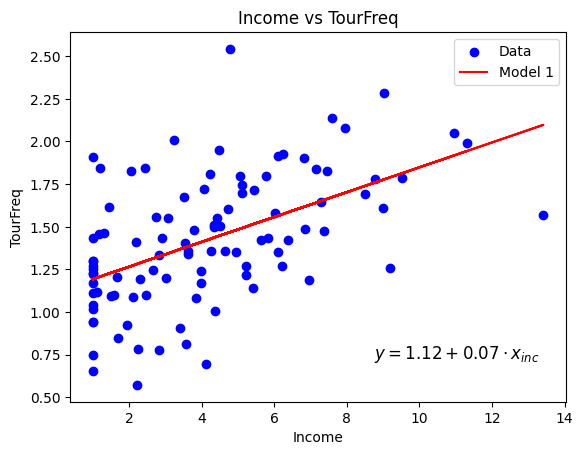

In [ ]:
# Estimate TourFreq using least squares regression
import numpy as np
from sklearn.linear_model import LinearRegression

y = df["TourFreq"]

x_inc = df["Income"]

# model y = beta_0 + beta_inc * x_inc, estimating betas
x_inc = x_inc.values.reshape(-1, 1)
model_1 = LinearRegression().fit(x_inc, y)
beta_0_model_1 = model_1.intercept_
beta_inc_model_1 = model_1.coef_[0]


# Plot the data and the regression line
import matplotlib.pyplot as plt

plt.scatter(x_inc, y, color='blue', label="Data")
plt.plot(x_inc, model_1.predict(x_inc), color='red', label="Model 1")

plt.xlabel("Income")
plt.ylabel("TourFreq")
plt.title("Income vs TourFreq")

# Write out the model with nice latex formatting
# in the lower right corner of the plot using plt.text()
plt.text(0.6, 0.2, r"$y = " + str(round(beta_0_model_1, 2)) + " + " + str(round(beta_inc_model_1, 2)) + " \cdot x_{inc}$", fontsize=12, transform=plt.gcf().transFigure)

plt.legend()
plt.show()


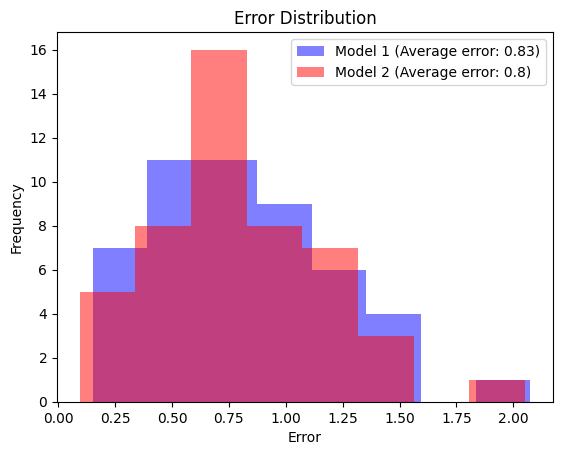

In [32]:
x_car = df["Carown"]
x_PT1 = df["PTlevel"] == 1 # PTlevel = 1
x_PT2 = df["PTlevel"] == 2 # PTlevel = 2

# Model two y = beta_0 + beta_inc * x_inc + beta_car * x_car + beta_PT1 * x_PT1 + beta_PT2 * x_PT2
# Using least squares with the variables x_inc, x_car, x_PT1, x_PT2 NOT the origial df
model_2 = LinearRegression().fit(np.column_stack((x_inc, x_car, x_PT1, x_PT2)), y)
beta_0_model_2 = model_2.intercept_
beta_inc_model_2 = model_2.coef_[0]
beta_car_model_2 = model_2.coef_[1]
beta_PT1_model_2 = model_2.coef_[2]
beta_PT2_model_2 = model_2.coef_[3]

# Calculate errors with the two models and plot the distribution of errors
y_hat_model_1 = model_1.predict(x_inc)
y_hat_model_2 = model_2.predict(np.column_stack((x_inc, x_car, x_PT1, x_PT2)))

errors_model_1 = (y**2 - y_hat_model_1**2)**0.5
errors_model_2 = (y**2 - y_hat_model_2**2)**0.5

average_error_model_1 = np.mean(errors_model_1)
average_error_model_2 = np.mean(errors_model_2)


plt.hist(errors_model_1, bins=8, color='blue', alpha=0.5, label="Model 1 (Average error: " + str(round(average_error_model_1, 2)) + ")")
plt.hist(errors_model_2, bins=8, color='red', alpha=0.5, label="Model 2 (Average error: " + str(round(average_error_model_2, 2)) + ")")
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.title("Error Distribution")
plt.legend()
plt.show()


In [39]:
# Print out the model 1 variables (rounded)
print("Model 1:")
print(f"beta_0 = {beta_0_model_1:.2f}")
print(f"beta_inc = {beta_inc_model_1:.2f}")

print("\n")
# Print out the model 2 variables (rouded)
print("Model 2:")
print(f"beta_0 = {beta_0_model_2:.2f}")
print(f"beta_inc = {beta_inc_model_2:.2f}")
print(f"beta_car = {beta_car_model_2:.2f}")
print(f"beta_PT1 = {beta_PT1_model_2:.2f}")
print(f"beta_PT2 = {beta_PT2_model_2:.2f}")


# Calculate scores
# Model 1
y_hat_model_1 = model_1.predict(x_inc)

# Model 2
y_hat_model_2 = model_2.predict(np.column_stack((x_inc, x_car, x_PT1, x_PT2)))

# Calculate R^2
R2_model_1 = 1 - np.sum((y - y_hat_model_1)**2) / np.sum((y - np.mean(y))**2)
R2_model_2 = 1 - np.sum((y - y_hat_model_2)**2) / np.sum((y - np.mean(y))**2)

# Calculate adjusted R^2
n = len(y)
p_model_1 = 1
p_model_2 = 4
adj_R2_model_1 = 1 - (n - 1) / (n - p_model_1) * (1 - R2_model_1)
adj_R2_model_2 = 1 - (n - 1) / (n - p_model_2) * (1 - R2_model_2)

print("\n")
# Print out the scores
print("Model 1:")
print(f"R^2 = {R2_model_1:.2f}")
print(f"Adjusted R^2 = {adj_R2_model_1:.2f}")

print("\n")
print("Model 2:")
print(f"R^2 = {R2_model_2:.2f}")
print(f"Adjusted R^2 = {adj_R2_model_2:.2f}")


Model 1:
beta_0 = 1.12
beta_inc = 0.07


Model 2:
beta_0 = 0.56
beta_inc = 0.06
beta_car = 0.37
beta_PT1 = 0.24
beta_PT2 = 0.16


Model 1:
R^2 = 0.27
Adjusted R^2 = 0.27


Model 2:
R^2 = 0.40
Adjusted R^2 = 0.38


In [43]:
# Predict with x_inc=3, x_cat=1 and x_PT1=1 and x_PT2=0
x_inc_pred = 3
x_car_pred = 1  
x_PT1_pred = 1
x_PT2_pred = 0

y_pred_model_1 = beta_0_model_1 + beta_inc_model_1 * x_inc_pred
y_pred_model_2 = beta_0_model_2 + beta_inc_model_2 * x_inc_pred + beta_car_model_2 * x_car_pred + beta_PT1_model_2 * x_PT1_pred + beta_PT2_model_2 * x_PT2_pred

print("\n")
# Print out the predictions
print("Model 1:")
print(f"Predicted TourFreq: {y_pred_model_1:.2f}")

print("\n")
print("Model 2:")
print(f"Predicted TourFreq: {y_pred_model_2:.2f}")



Model 1:
Predicted TourFreq: 1.34


Model 2:
Predicted TourFreq: 1.36
